### 目的
RDD分析

In [1]:
# 必要なパッケージをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import japanize_matplotlib

In [2]:
# 連続性の仮定の説明
data = pd.read_csv("../data/data17a.csv")
data

,x1,x2
0,58,58
1,55,55
2,67,67
3,37,37
4,72,72
...,...,...
6553,48,48
6554,46,46
6555,59,59
6556,31,31


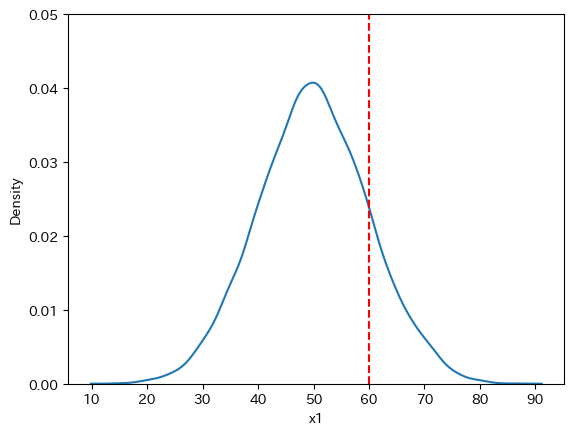

In [3]:
fig, ax = plt.subplots()
sns.kdeplot(data=data, x="x1")

y_first = 0
y_last = 0.05
plt.ylim(y_first, y_last)
plt.vlines(60, y_first, y_last, linestyles="dashed", colors="r")

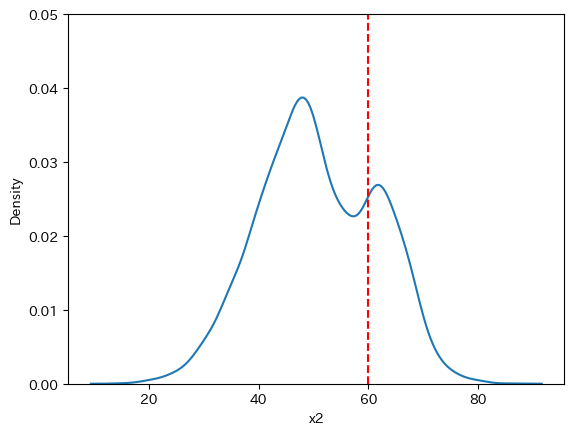

In [4]:
fig, ax = plt.subplots()
sns.kdeplot(data=data, x="x2")

y_first = 0
y_last = 0.05
plt.ylim(y_first, y_last)
plt.vlines(60, y_first, y_last, linestyles="dashed", colors="r")

In [5]:
# データ読み込み
df = pd.read_csv("../data/data15.csv")
df

,y0t,y1t,y3,t1,x1
0,114.43,129.11,114.43,0,128.98
1,197.06,129.25,129.25,1,184.61
2,114.29,109.95,114.29,0,118.61
3,151.82,114.62,114.62,1,151.75
4,194.04,125.55,125.55,1,192.79
...,...,...,...,...,...
995,98.22,94.27,98.22,0,99.26
996,120.50,106.88,120.50,0,111.05
997,186.99,139.35,139.35,1,187.89
998,124.91,115.34,124.91,0,124.75


In [6]:
df.describe()

,y0t,y1t,y3,t1,x1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,151.165800,122.191390,123.916310,0.798000,150.435160
std,27.345169,14.760198,14.052268,0.401693,25.300182
min,65.310000,53.890000,65.310000,0.000000,62.550000
25%,132.722500,112.832500,115.395000,1.000000,133.607500
50%,150.910000,122.915000,124.405000,1.000000,150.560000
75%,169.470000,131.752500,132.815000,1.000000,167.295000
max,229.330000,174.080000,174.080000,1.000000,235.050000


Text(0, 0.5, '処置後の血圧')

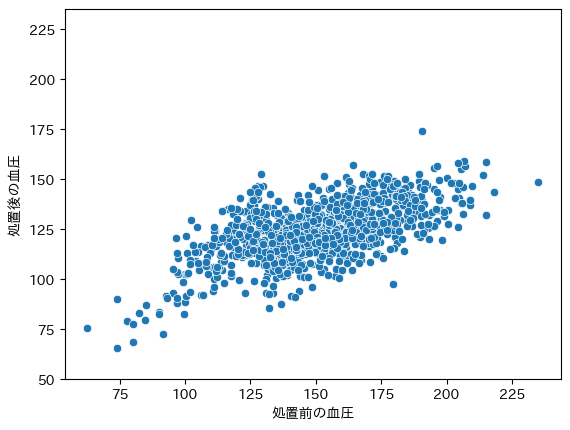

In [7]:
# 観測できるはずのデータ
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=df, x="x1", y="y3")

y_first = 50
y_last = 235
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")

Text(0, 0.5, '処置後の血圧')

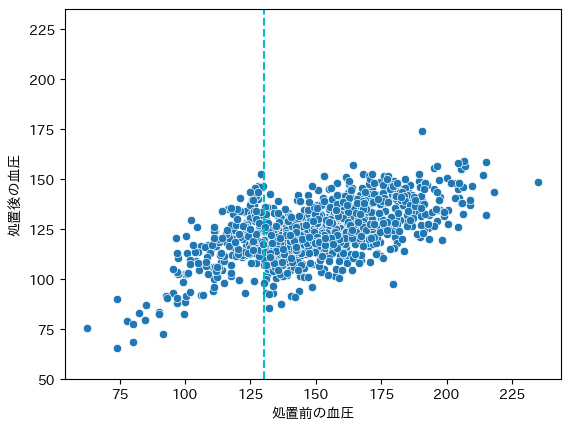

In [8]:
# 観測できるはずのデータ
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=df, x="x1", y="y3")

y_first = 50
y_last = 235
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")

Text(0, 0.5, '処置後の血圧')

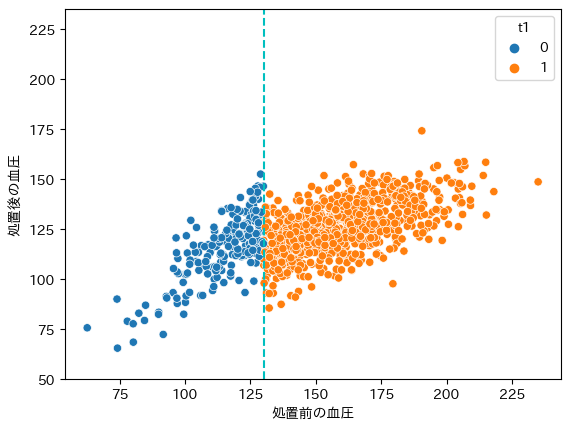

In [9]:
# 観測できるはずのデータ(ラベルで色分け)
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=df, x="x1", y="y3", hue="t1")

y_first = 50
y_last = 235
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")

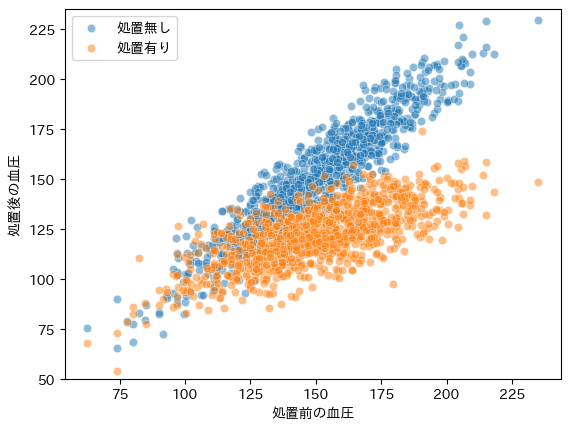

In [10]:
# 潜在的結果変数のデータ: 観測できない
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=df, x="x1", y="y0t", alpha=0.5, label="処置無し")
ax = sns.scatterplot(data=df, x="x1", y="y1t", alpha=0.5, label="処置有り")

y_first = 50
y_last = 235
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")
ax.legend()

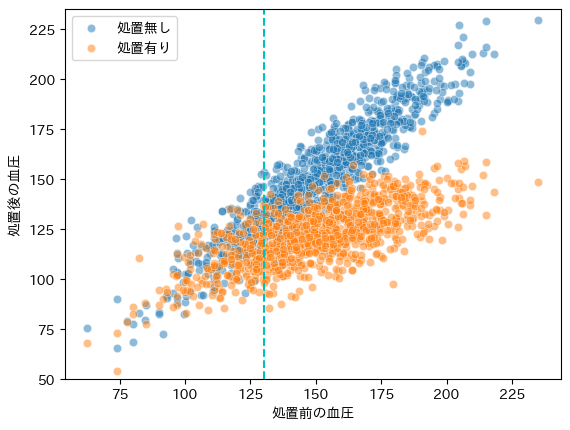

In [11]:
# 潜在的結果変数のデータ: 観測できない
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=df, x="x1", y="y0t", alpha=0.5, label="処置無し")
ax = sns.scatterplot(data=df, x="x1", y="y1t", alpha=0.5, label="処置有り")

y_first = 50
y_last = 235
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")
ax.legend()

In [12]:
# 平均処置効果: 潜在的結果変数で計算
ate = df["y1t"].mean() - df["y0t"].mean()

# ナイーブ推定量: 集計による計算
naive_pred = df[df["t1"]==1]["y1t"].mean() - df[df["t1"]==0]["y0t"].mean()

print(f"平均処置効果:{ate.round(1)}")
print(f"集計による効果推定:{naive_pred.round(1)}")

平均処置効果:-29.0
集計による効果推定:10.3


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# 回帰分析
Y = df["y3"]
X = df.drop("y3", axis=1)
col_nm = ["t1", "x1"]

model = LinearRegression()
model.fit(X[col_nm].values, Y.values) # モデリング
t1_coefficient = model.coef_[0] # 推定効果

print(f"共分散分析による推定効果(パラメトリック):{t1_coefficient.round(1)}")

共分散分析による推定効果(パラメトリック):-9.4


/var/folders/hw/_dxs5mbn55925zfkvtr_p2v00000gn/T/ipykernel_9375/1413663395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t0["bin"], t0_bins = pd.qcut(df_t0["x1"], 20, labels=list(range(1, 21)), retbins=True)
/var/folders/hw/_dxs5mbn55925zfkvtr_p2v00000gn/T/ipykernel_9375/1413663395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1["bin"], t1_bins = pd.qcut(df_t1["x1"], 80, labels=list(range(1, 81)), retbins=True)


Text(0, 0.5, '処置後の血圧')

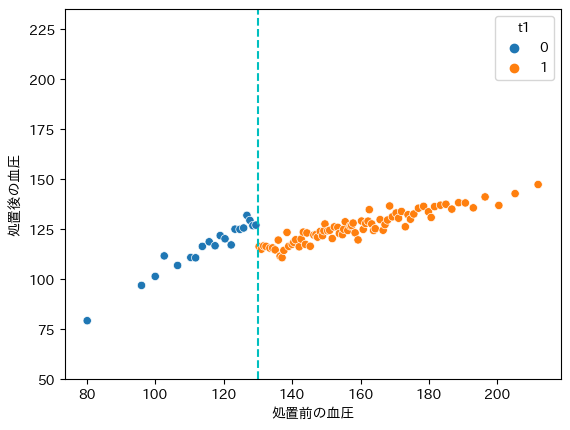

In [15]:
# RDプロット
df1 = df[["y3", "t1", "x1"]]
df_t0 = df1[df1["t1"] == 0]
df_t1 = df1[df1["t1"] == 1]

df_t0["bin"], t0_bins = pd.qcut(df_t0["x1"], 20, labels=list(range(1, 21)), retbins=True)
t0x1_median_df = df_t0[["bin", "x1"]].groupby("bin", as_index=False).median()
t0y3_median_df = df_t0[["bin", "y3"]].groupby("bin", as_index=False).mean()
df_t0_rd = pd.merge(t0x1_median_df, t0y3_median_df, on="bin", how="outer")[["y3", "x1"]]
df_t0_rd["t1"] = 0

df_t1["bin"], t1_bins = pd.qcut(df_t1["x1"], 80, labels=list(range(1, 81)), retbins=True)
t1x1_median_df = df_t1[["bin", "x1"]].groupby("bin", as_index=False).median()
t1y3_median_df = df_t1[["bin", "y3"]].groupby("bin", as_index=False).mean()
df_t1_rd = pd.merge(t1x1_median_df, t1y3_median_df, on="bin", how="outer")[["y3", "x1"]]
df_t1_rd["t1"] = 1

rd_df = pd.concat([df_t0_rd, df_t1_rd], axis=0)

# RDプロット
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=rd_df, x="x1", y="y3", hue="t1")

y_first = 50
y_last = 235
plt.ylim(y_first, y_last)
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")


ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")

In [16]:
# 連続性の仮定の診断: ヒストグラムによる確認
df

,y0t,y1t,y3,t1,x1
0,114.43,129.11,114.43,0,128.98
1,197.06,129.25,129.25,1,184.61
2,114.29,109.95,114.29,0,118.61
3,151.82,114.62,114.62,1,151.75
4,194.04,125.55,125.55,1,192.79
...,...,...,...,...,...
995,98.22,94.27,98.22,0,99.26
996,120.50,106.88,120.50,0,111.05
997,186.99,139.35,139.35,1,187.89
998,124.91,115.34,124.91,0,124.75


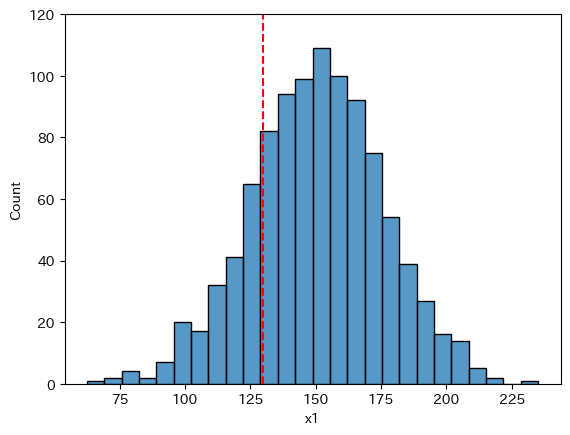

In [17]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="x1")

y_first = 0
y_last = 120
plt.ylim(y_first, y_last)
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="r")

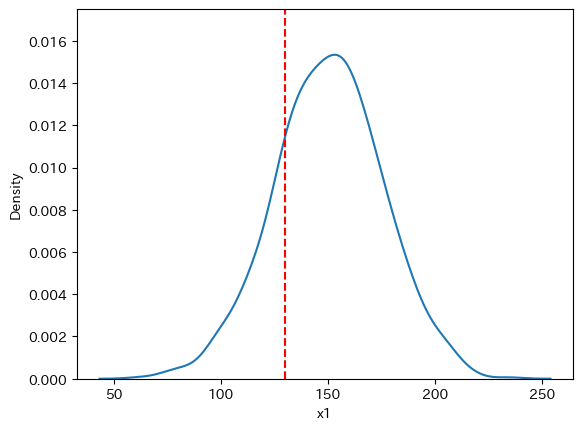

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(data=df, x="x1")

y_first = 0
y_last = 0.0175
plt.ylim(y_first, y_last)
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="r")

Text(0, 0.5, '処置後の血圧')

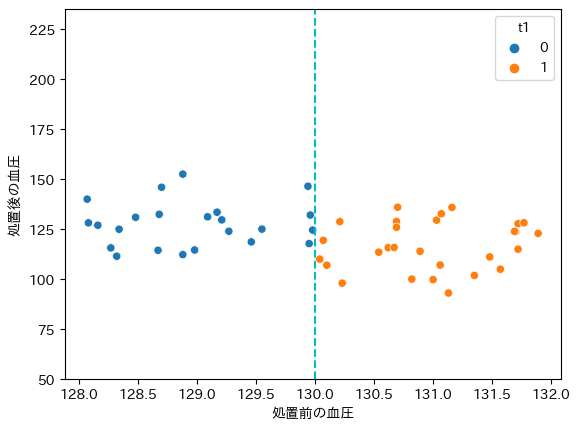

In [19]:
# 観測できるはずのデータのバンド幅の周辺(ラベルで色分け)
local_df = df[(df["x1"]>=128) & (df["x1"]<=132)]

fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=local_df, x="x1", y="y3", hue="t1")

y_first = 50
y_last = 235
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")

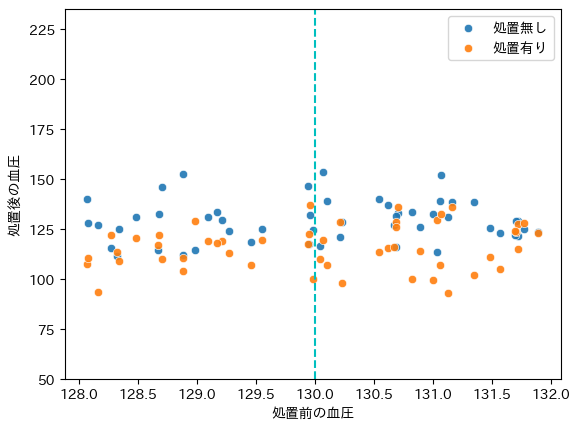

In [20]:
# 潜在的結果変数のデータ: 観測できない
fig, ax = plt.subplots(1, 1)
ax = sns.scatterplot(data=local_df, x="x1", y="y0t", alpha=0.9, label="処置無し")
ax = sns.scatterplot(data=local_df, x="x1", y="y1t", alpha=0.9, label="処置有り")

y_first = 50
y_last = 235
plt.vlines(130, y_first, y_last, linestyles="dashed", colors="c")
plt.ylim(y_first, y_last)

ax.set_xlabel("処置前の血圧")
ax.set_ylabel("処置後の血圧")
ax.legend()

In [21]:
# 局所的な平均処置効果
late = local_df["y1t"].mean() - local_df["y0t"].mean() 
print(f"局所的な平均処置効果: {late.round(1)}")

# ノンパラメトリックRDD
Y = local_df["y3"]
X = local_df.drop("y3", axis=1)
col_nm = ["t1", "x1"]
model = LinearRegression()
model.fit(X[col_nm].values, Y.values) # モデリング
t1_coefficient = model.coef_[0] # 推定効果
print(f"共分散分析による推定効果(ノンパラメトリック):{t1_coefficient.round(1)}")

# col_nm = ["t1", "x1", "tx1"]
# model = LinearRegression()
# model.fit(X[col_nm].values, Y.values) # モデリング
# late_pred = model.coef_[0] + model.coef_[2]*130 # 推定効果
# print(f"交互作用項を含む共分散分析による推定効果(ノンパラメトリック):{late_pred.round(1)}")

局所的な平均処置効果: -13.1
共分散分析による推定効果(ノンパラメトリック):-15.1
